In [1]:
library(mgcv)
library(psych)
library(ggplot2)
library(corrplot)
library(RColorBrewer)
library(WVPlots)
library(reshape2)
library(lars)
library(MASS)

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Warning message:
"package 'psych' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"


ERROR: Error: package or namespace load failed for 'ggplot2' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.4.5 is already loaded, but >= 0.4.10 is required


In [161]:
library(ridge)

Warning message:
"package 'ridge' was built under R version 3.6.3"


In [ ]:
corrplot(M, method = "number") 

In [2]:
df = read.csv("../../data/tidy/system-model-19-04.csv")

In [3]:
head(df)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,NA,5,1,0,766.80982,20518.943889,20488.48333,10.211944,8.805278,...,14.068333333,19059.505833,8.20055556,3.3375000,21.70410,0.03737082,NA,NA,NA,NA
2,2,NA,5,1,1,224.00092,1433.453056,1424.07694,2.443333,3.037500,...,2.736944444,1424.177222,1.35333333,1.2955556,26.08955,0.15626666,NA,NA,NA,NA
3,3,NA,5,1,2,83.01897,5.771944,1.76750,1.313056,1.537222,...,0.001666667,3.003056,0.01305556,0.5802778,23.04987,14.38318945,NA,NA,NA,NA
4,4,2019,4,1,0,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,1561.0,2,42,40.567
5,5,2019,4,1,1,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,171.7,2,42,35.110
6,6,2019,4,1,10,1157.92787,117.502778,63.17194,21.106944,15.074167,...,33.216944444,52.217500,15.46083333,5.1025000,19.38688,9.85447235,19134.9,2,42,53.894


In [4]:
df1 = df [-(1:5),]

In [5]:
df = df1

In [74]:
df3 = df2[,-16]

In [81]:
df3 = na.omit(df3)

In [83]:
matrix = cor(df3)

In [84]:
matrix

,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,accel_bin_1_time_hr,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,TAVG,energy_kwh
distance_mile,1.0000000,0.8123039,0.6481836,0.9895865,0.9904536,0.9940583,0.99524868,0.98407759,0.9906591,0.5973406,0.9966834,0.99092964,-0.118998574,0.554958490,0.8335110,-0.135137238,0.9579276
time_hr,0.8123039,1.0000000,0.9704905,0.7941916,0.7899627,0.8040534,0.79489112,0.78499900,0.7992398,0.9445612,0.8055414,0.79674223,-0.134643756,0.103254359,0.6945557,-0.147841431,0.7794618
speed_bin_1_time_hr,0.6481836,0.9704905,1.0000000,0.6265748,0.6213742,0.6404770,0.62833041,0.61919450,0.6352330,0.9867119,0.6403602,0.63206885,-0.124934723,-0.094825603,0.5672843,-0.130430050,0.6213146
speed_bin_2_time_hr,0.9895865,0.7941916,0.6265748,1.0000000,0.9820452,0.9756828,0.97932427,0.96512882,0.9834034,0.5775188,0.9867725,0.97489900,-0.145571073,0.544459985,0.8216759,-0.175578543,0.9630237
speed_bin_3_time_hr,0.9904536,0.7899627,0.6213742,0.9820452,1.0000000,0.9823511,0.97976840,0.97935535,0.9774750,0.5716775,0.9897057,0.98083498,-0.107005979,0.582310602,0.7917778,-0.173395909,0.9502552
speed_bin_4_time_hr,0.9940583,0.8040534,0.6404770,0.9756828,0.9823511,1.0000000,0.99012613,0.98912771,0.9819381,0.5896393,0.9928206,0.99279376,-0.113562018,0.568232952,0.8154556,-0.100501590,0.9366696
speed_bin_5_time_hr,0.9952487,0.7948911,0.6283304,0.9793243,0.9797684,0.9901261,1.00000000,0.98131299,0.9853879,0.5771520,0.9908982,0.98674403,-0.099201292,0.570195380,0.8387821,-0.108261325,0.9528825
accel_bin_1_time_hr,0.9840776,0.7849990,0.6191945,0.9651288,0.9793553,0.9891277,0.98131299,1.00000000,0.9642195,0.5704555,0.9813709,0.99013435,-0.068833386,0.599788192,0.7703943,-0.085955696,0.9161992
accel_bin_2_time_hr,0.9906591,0.7992398,0.6352330,0.9834034,0.9774750,0.9819381,0.98538793,0.96421945,1.0000000,0.5821375,0.9891178,0.98549059,-0.148455576,0.526146603,0.8748727,-0.137958854,0.9597060
accel_bin_3_time_hr,0.5973406,0.9445612,0.9867119,0.5775188,0.5716775,0.5896393,0.57715199,0.57045548,0.5821375,1.0000000,0.5877556,0.58099108,-0.112522617,-0.134255189,0.5170511,-0.119457989,0.5713146


In [109]:
mycolor = brewer.pal(9, "Set1")

In [117]:
png("../../figures/Intrinsic-relationship-plot-April-2019.png",height=6000,width=6000,res=360)
PairPlot(df3,colnames(df3),"Intrinsic relationship between variables", palette=NULL,point_color = "darkorange")
dev.off()

png 
  2

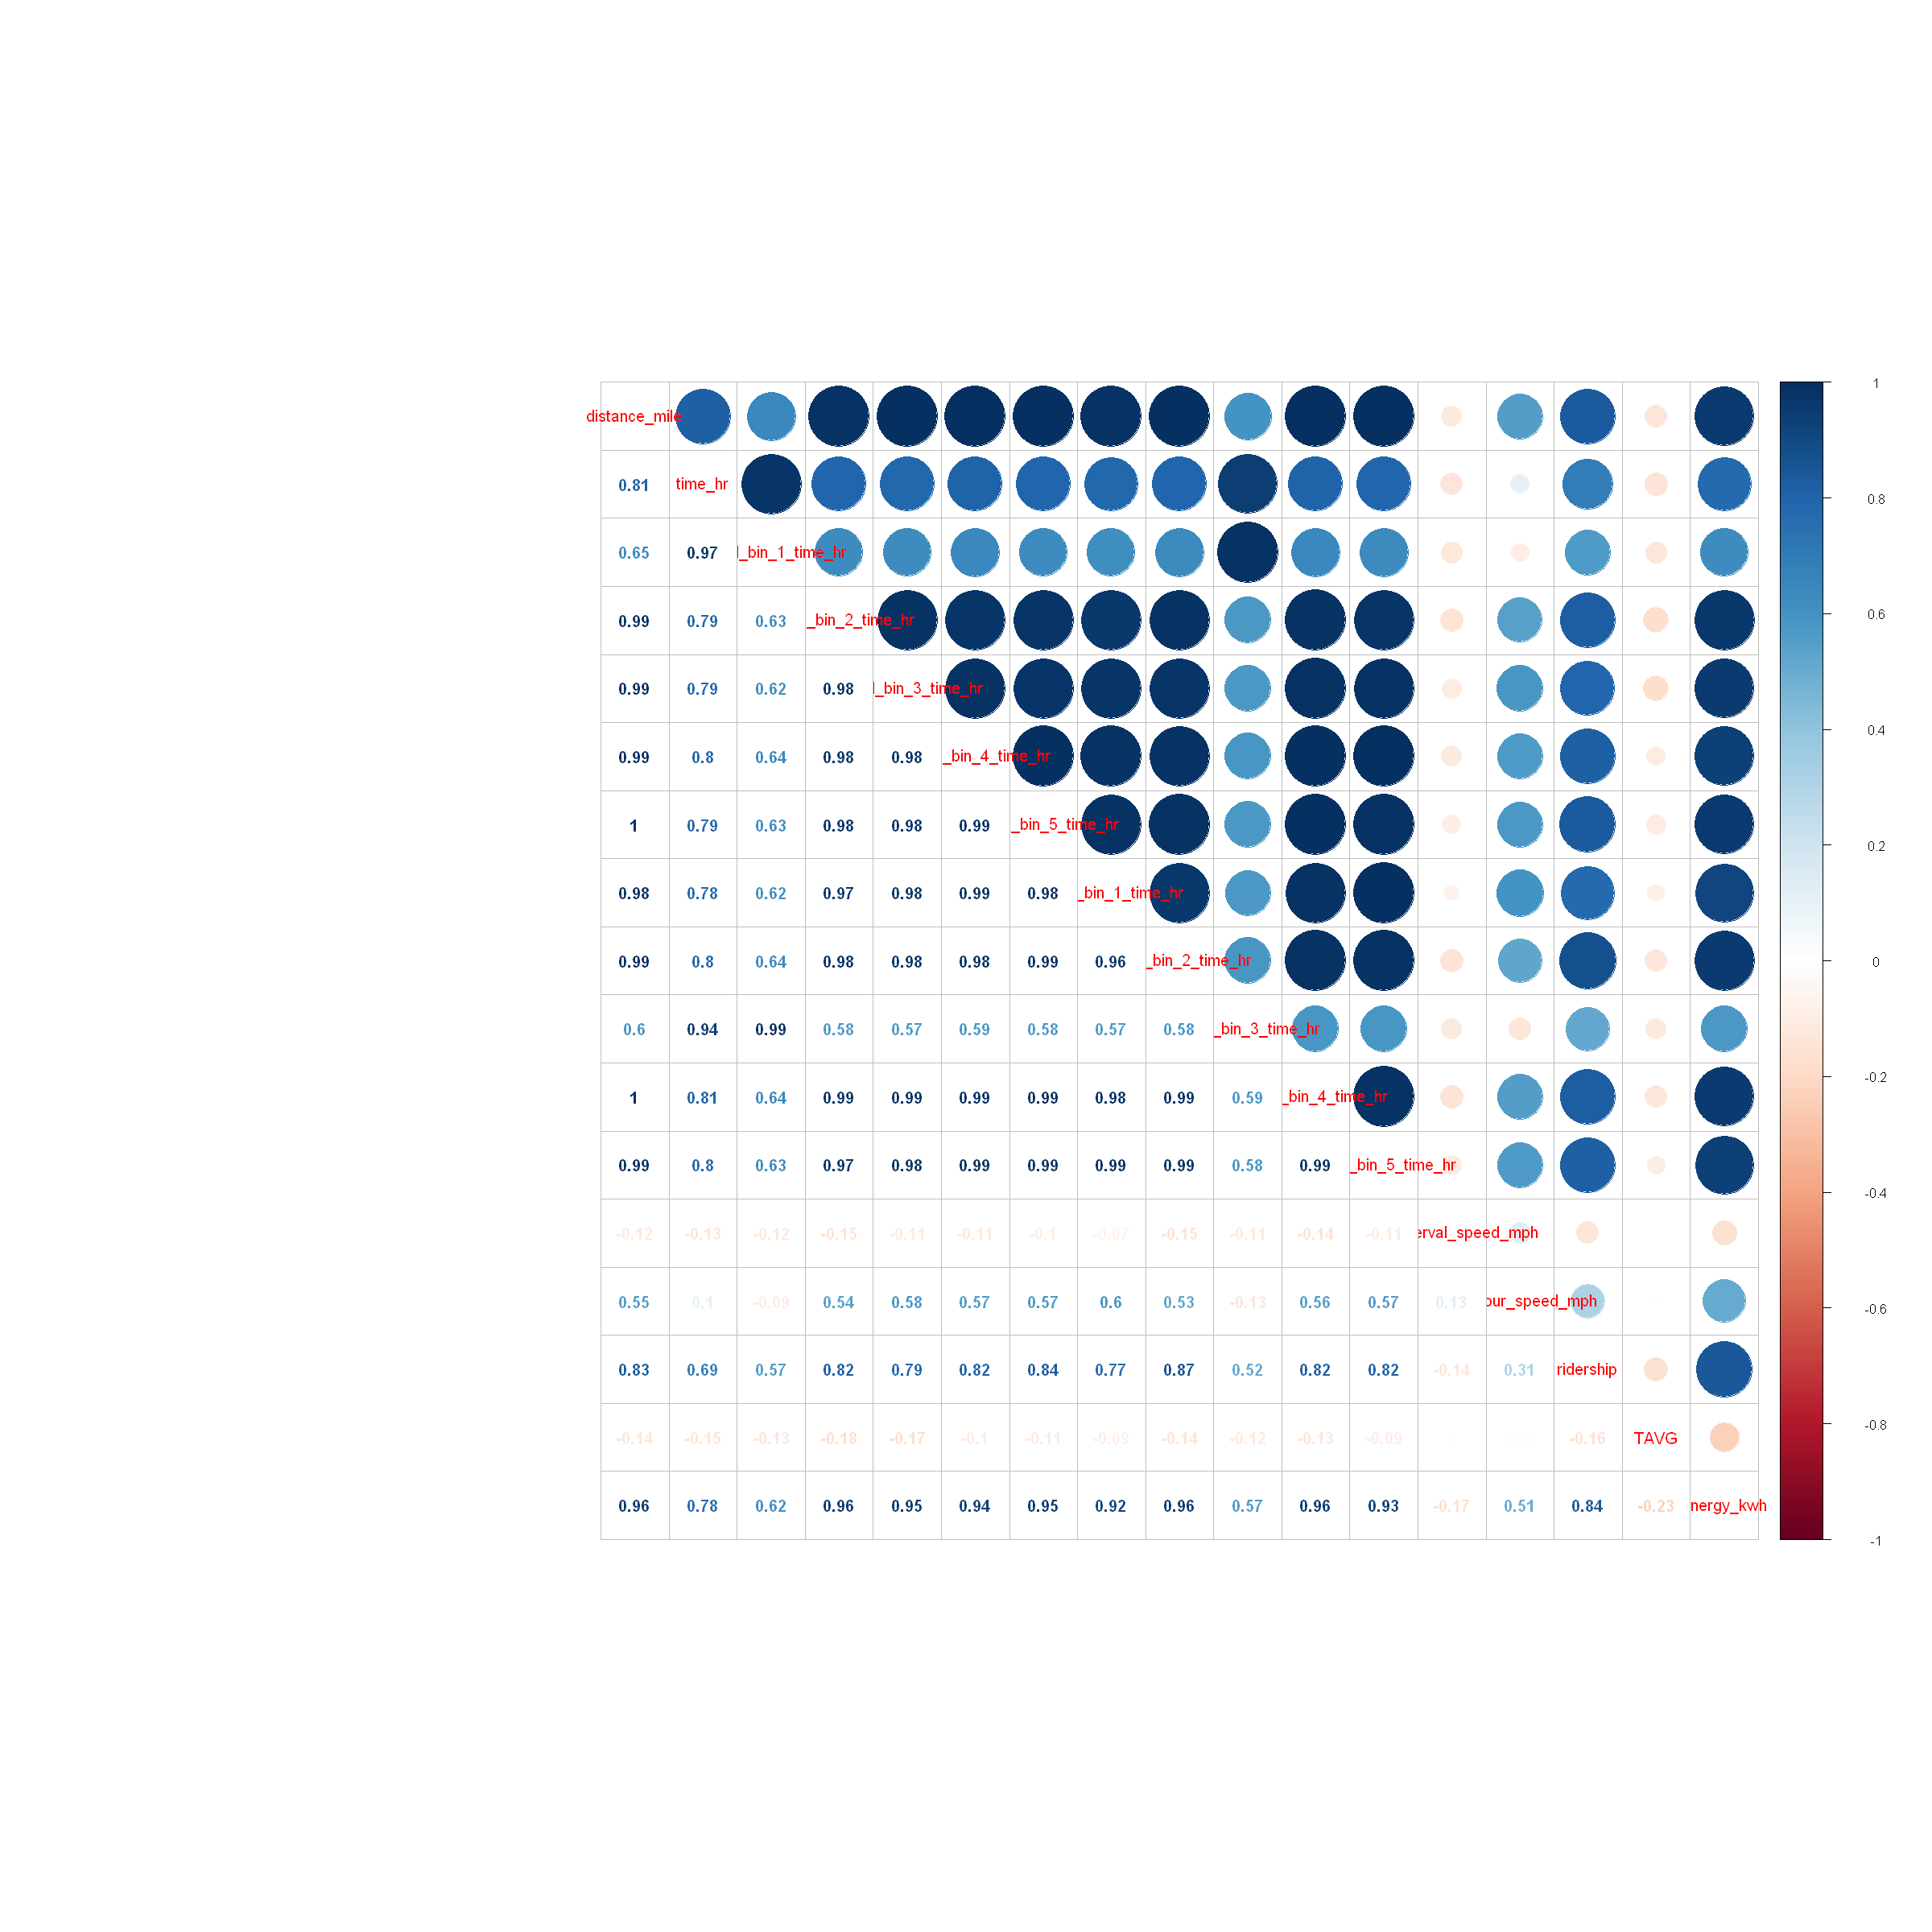

In [90]:
options(repr.plot.width = 20, repr.plot.height = 20)
corrplot.mixed(matrix)

In [97]:
png("../../figures/correleation-plot-April-2019.png",height=5000,width=5000,res=360)
corrplot(corr=matrix,method = "color",order = "hclust",tl.col="black",addrect=4,addCoef.col = "grey")
dev.off()

png 
  2

In [70]:
cor(df)

ERROR: Error in cor(df2): 'x' must be numeric


In [67]:
df2 = df[, 6:23]

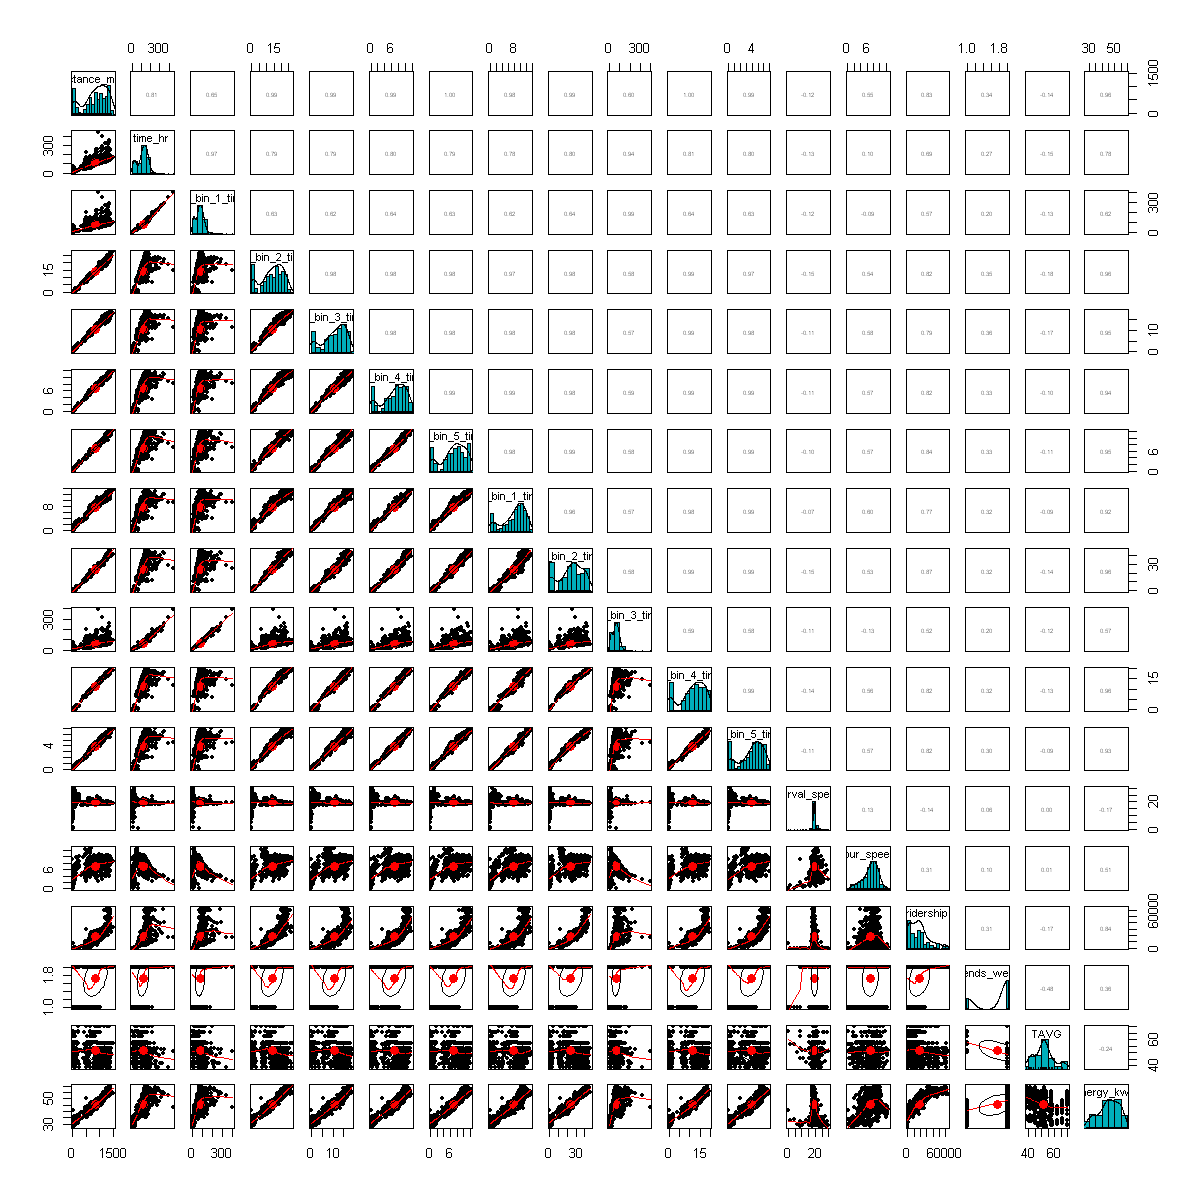

In [30]:
options(repr.plot.width = 10, repr.plot.height = 10)
pairs.panels(df2, 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE, # show correlation ellipses
             )

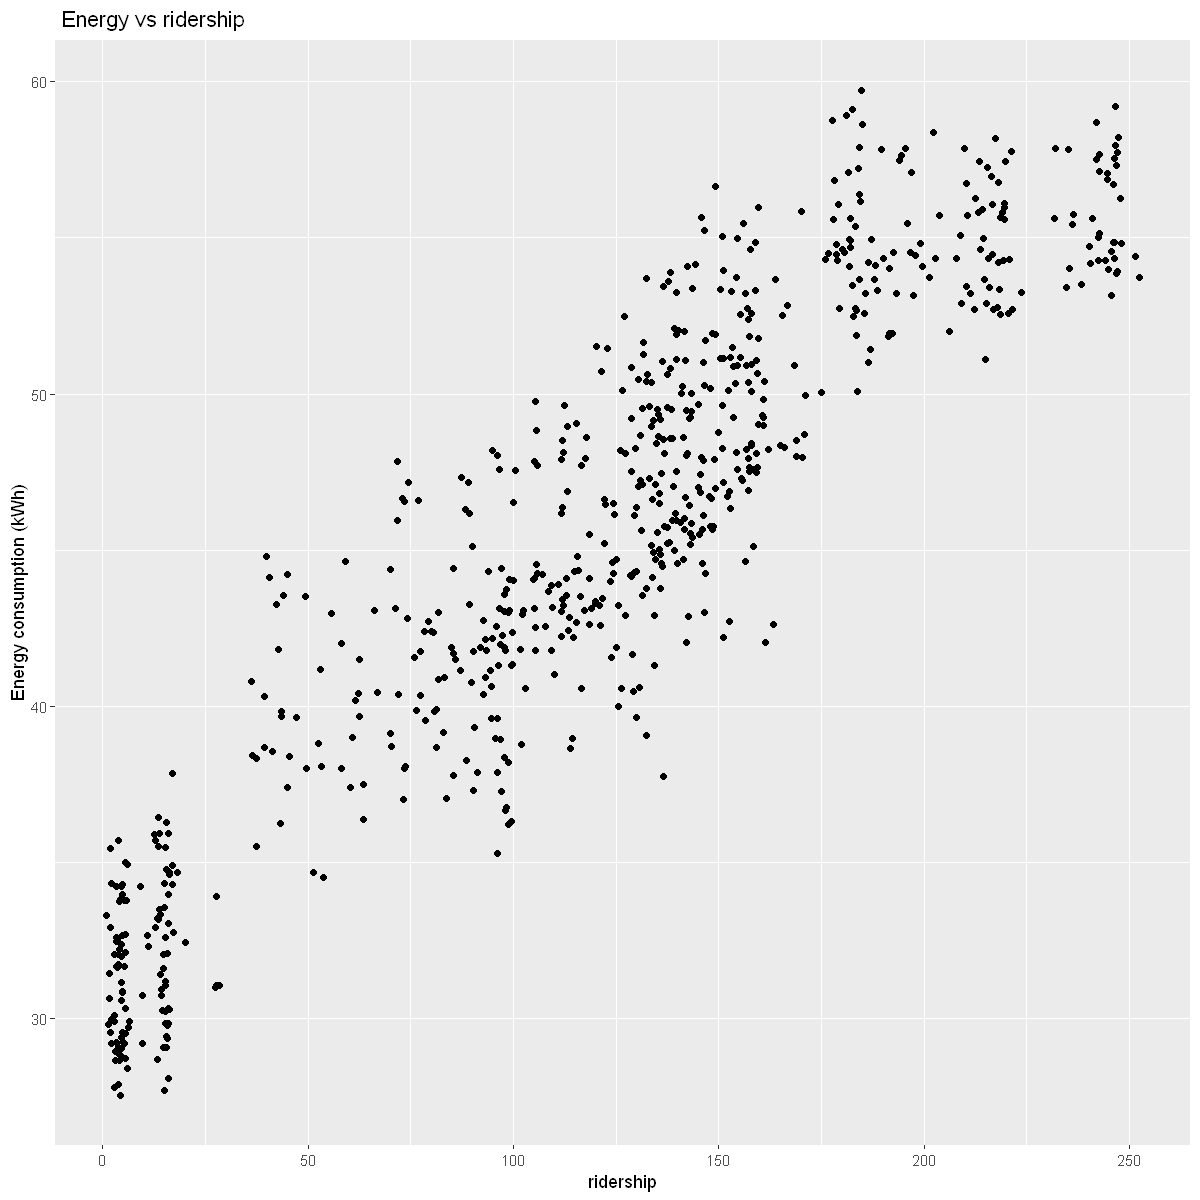

In [63]:
ggplot(df) + 
 geom_point(aes(x=sqrt(ridership), y=energy_kwh)) +
 labs(title =" Energy vs ridership ", y = "Energy consumption (kWh)", x = "ridership")

In [31]:
df$weekends_weekday = as.factor(df$weekends_weekday)

In [39]:
cor(df2)

,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,accel_bin_1_time_hr,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
distance_mile,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
time_hr,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
speed_bin_1_time_hr,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
speed_bin_2_time_hr,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
speed_bin_3_time_hr,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
speed_bin_4_time_hr,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
speed_bin_5_time_hr,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
accel_bin_1_time_hr,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
accel_bin_2_time_hr,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA
accel_bin_3_time_hr,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA


In [41]:
head(df2)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
6,6,2019,4,1,10,1157.9279,117.5028,63.17194,21.10694,15.07417,...,33.21694,52.21750,15.46083,5.102500,19.38688,9.854472,19134.9,2,42,53.894
7,7,2019,4,1,11,1015.1473,104.4983,55.72083,19.12222,14.50750,...,28.31611,48.17361,13.63389,4.438056,18.03608,9.714483,17253.1,2,42,49.551
8,8,2019,4,1,12,987.7224,106.6147,58.56194,19.76028,12.88806,...,28.26639,50.29861,13.49528,4.503333,18.57697,9.264409,17870.3,2,42,48.963
9,9,2019,4,1,13,947.9956,106.5056,61.61694,16.85667,12.75944,...,27.08194,52.34806,13.50861,4.230000,18.60897,8.900903,18464.4,2,42,49.200
10,10,2019,4,1,14,1069.2355,141.7883,91.71944,19.22333,13.67806,...,31.45056,77.62778,14.68083,4.839444,19.24698,7.541068,24528.1,2,42,50.928
11,11,2019,4,1,15,1246.3414,141.4372,84.90639,20.30056,14.82972,...,37.28361,69.25000,17.03083,5.454167,19.30834,8.811976,31965.0,2,42,54.272


In [6]:
#Split the hour data
set.seed(1234)
rate = 0.8
sub = sample(1:nrow(df),round(nrow(df)*rate))#the split ratio is 0.8
dfh_train = df[sub,]
dfh_test = df[-sub,]

In [10]:
modelFit_hour_linear= lm(energy_kwh~ridership + avg_interval_speed_mph +
                         avg_hour_speed_mph +
                         speed_bin_1_time_hr + speed_bin_2_time_hr + 
                         speed_bin_3_time_hr +
                         speed_bin_4_time_hr + speed_bin_5_time_hr +
                         accel_bin_1_time_hr + 
                         accel_bin_2_time_hr + accel_bin_3_time_hr + accel_bin_4_time_hr + accel_bin_5_time_hr+
                         TAVG,data=dfh_train)#select=TRUE weekends_weekday)
summary(modelFit_hour_linear)


Call:
lm(formula = energy_kwh ~ ridership + avg_interval_speed_mph + 
    avg_hour_speed_mph + speed_bin_1_time_hr + speed_bin_2_time_hr + 
    speed_bin_3_time_hr + speed_bin_4_time_hr + speed_bin_5_time_hr + 
    accel_bin_1_time_hr + accel_bin_2_time_hr + accel_bin_3_time_hr + 
    accel_bin_4_time_hr + accel_bin_5_time_hr + TAVG, data = dfh_train)

Residuals:
   Min     1Q Median     3Q    Max 
-4.780 -1.361 -0.120  1.258 11.027 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.588e+01  1.020e+00  35.175  < 2e-16 ***
ridership               2.094e-05  1.510e-05   1.387 0.166051    
avg_interval_speed_mph -9.283e-02  3.746e-02  -2.478 0.013524 *  
avg_hour_speed_mph      1.417e-01  6.444e-02   2.199 0.028284 *  
speed_bin_1_time_hr     8.608e-03  1.097e-02   0.784 0.433121    
speed_bin_2_time_hr     4.093e-01  7.676e-02   5.332 1.44e-07 ***
speed_bin_3_time_hr     4.313e-01  1.297e-01   3.324 0.000948 ***
speed_bin_4_time_h

In [173]:
png("../../figures/ridge-April-2019.png",height=5000,width=5000,res=360)
matplot(modelFit_hour_linear_ridge$lambda, t(modelFit_hour_linear_ridge$coef), xlab = expression(lamdba), ylab = "Cofficients",

type = "l", lty = 1:20)

abline(v = modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)])
dev.off()

png 
  2

In [167]:
summary(modelFit_hour_linear_ridge)

       Length Class  Mode   
coef   2114   -none- numeric
scales   14   -none- numeric
Inter     1   -none- numeric
lambda  151   -none- numeric
ym        1   -none- numeric
xm       14   -none- numeric
GCV     151   -none- numeric
kHKB      1   -none- numeric
kLW       1   -none- numeric

In [168]:
modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)]
modelFit_hour_linear_ridge$coef[which.min(modelFit_hour_linear_ridge$GCV)]

[1] 1

[1] 0.3052366

In [170]:
png("../../figures/ridge-April-2019.png",height=5000,width=5000,res=360)
plot(modelFit_hour_linear_ridge$lambda, modelFit_hour_linear_ridge$GCV, type = "l", xlab = expression(lambda), 
    ylab = expression(beta))
abline(v = modelFit_hour_linear_ridge$lambda[which.min(modelFit_hour_linear_ridge$GCV)])
dev.off()

png 
  2

In [34]:
modelFit_hour_linear= lm(energy_kwh~ridership+avg_interval_speed_mph+avg_hour_speed_mph+
                         speed_bin_1_time_hr + speed_bin_2_time_hr + speed_bin_3_time_hr + speed_bin_4_time_hr + speed_bin_5_time_hr+
                         #accel_bin_1_time_hr + accel_bin_2_time_hr + accel_bin_3_time_hr + accel_bin_4_time_hr + accel_bin_5_time_hr+
                         TAVG+time_hr,data=dfh_train,select=TRUE)
summary(modelFit_hour_linear)

Warning message:
"In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument 'select' will be disregarded"



Call:
lm(formula = energy_kwh ~ ridership + avg_interval_speed_mph + 
    avg_hour_speed_mph + speed_bin_1_time_hr + speed_bin_2_time_hr + 
    speed_bin_3_time_hr + speed_bin_4_time_hr + speed_bin_5_time_hr + 
    TAVG + time_hr, data = dfh_train, select = TRUE)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1534 -1.4155 -0.1382  1.3104 10.8056 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.774e+01  1.029e+00  36.655  < 2e-16 ***
ridership               6.540e-05  1.049e-05   6.235 9.23e-10 ***
avg_interval_speed_mph -1.747e-01  3.598e-02  -4.857 1.57e-06 ***
avg_hour_speed_mph      1.150e-01  6.764e-02   1.701   0.0895 .  
speed_bin_1_time_hr    -1.192e+01  8.543e+00  -1.396   0.1633    
speed_bin_2_time_hr    -1.141e+01  8.546e+00  -1.335   0.1825    
speed_bin_3_time_hr    -1.145e+01  8.544e+00  -1.341   0.1806    
speed_bin_4_time_hr    -1.341e+01  8.539e+00  -1.571   0.1168    
speed_bin_5_time_hr    -1.054e+0

In [123]:
head(dfh_test)

,X,year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,...,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
10,10,2019,4,1,14,1069.23545,141.788333,91.719444,19.2233333,13.6780556,...,31.4505556,77.627778,14.6808333,4.83944444,19.24698,7.541068,24528.1,2,42,50.928
11,11,2019,4,1,15,1246.34141,141.437222,84.906389,20.3005556,14.8297222,...,37.2836111,69.250000,17.0308333,5.45416667,19.30834,8.811976,31965.0,2,42,54.272
13,13,2019,4,1,17,1372.40297,174.980278,114.061111,22.4277778,15.5255556,...,42.3280556,96.351944,18.3547222,6.18444444,19.07073,7.843187,58915.7,2,42,57.666
14,14,2019,4,1,18,1340.50510,151.721944,91.616389,22.2283333,15.2827778,...,40.9222222,74.914722,17.4702778,6.32527778,19.37017,8.835275,38218.2,2,42,57.869
21,21,2019,4,1,3,14.36943,4.939444,4.297778,0.2694444,0.1552778,...,0.4338889,3.121111,0.1736111,0.05361111,13.17757,2.909118,11.0,2,42,32.478
25,25,2019,4,1,7,1347.50198,134.801667,72.450278,23.2561111,16.9636111,...,40.1827778,53.694167,18.5361111,6.10555556,19.37512,9.996182,46424.9,2,42,57.236


In [120]:
pred1 <- predict.lm(modelFit_hour_linear, dfh_test)

In [143]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred1,
                          "Hour"=dfh_test$hour,"Year" = dfh_test$year,"Day" =dfh_test$day,"Month"=dfh_test$month)

In [144]:
test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))

In [145]:
head(test_compare)

,Observed.Response,X.Linear_model,Hour,Year,Day,Month,Date
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<date>
10,50.928,51.84622,14,2019,1,4,2019-04-01
11,54.272,54.41932,15,2019,1,4,2019-04-01
13,57.666,56.57205,17,2019,1,4,2019-04-01
14,57.869,54.20101,18,2019,1,4,2019-04-01
21,32.478,32.14679,3,2019,1,4,2019-04-01
25,57.236,55.91901,7,2019,1,4,2019-04-01


In [ ]:
colnames()

In [147]:
test_compare1 = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")

In [155]:
png("../../figures/Linear-model-April-2019.png",height=4000,width=5000,res=360)
ggplot(test_compare1) + 
 geom_line(aes(x=Date, y=x,color = type),size = 1,alpha = 0.4) +
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Date")
dev.off()

png 
  2

# Statisitics analysis

In [16]:
# Calculate the MSE of LM
mean((test_compare$Observed.Response - test_compare$X.Model1)^2,na.rm = TRUE)
#Calculate MAPE of LM
mean(abs((test_compare$Observed.Response - test_compare$X.Model1)/test_compare$Observed.Response),na.rm =TRUE) * 100

[1] 2.480333

[1] 3.064999

Warning message:
"Removed 4 rows containing missing values (geom_point)."


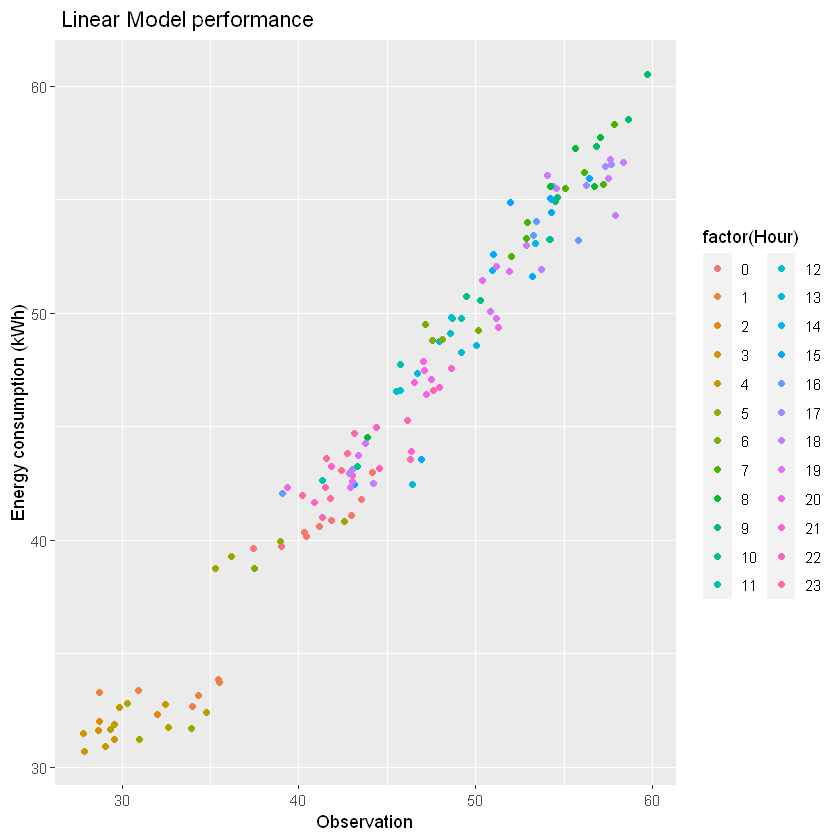

In [17]:
ggplot(test_compare) + 
 geom_point(aes(x=Observed.Response, y=X.Model1,color=factor(Hour))) +
 labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Observation")